 # Pokemon Image Clustering #

In [1]:
# for loading/processing the images
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input
# for other things
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [13]:
import os

pokemons = []
rootdir = '../data/PokemonData'
for subdir, dirs, files in os.walk(rootdir):
    for file in files:
        pokemons.append([file, subdir.split('\\')[-1]])
        
print(pokemons[:10])

[['0282b2f3a22745f1a436054ea15a0ae5.jpg', 'Abra'], ['06b9eec4827d4d49b1b4c284308708df.jpg', 'Abra'], ['10a9f06ec6524c66b779ea80354f8519.jpg', 'Abra'], ['1788abb8b51f48509cfac8067bd99e14.jpg', 'Abra'], ['28cfad92ad934d1f9b579cbff4b5d012.jpg', 'Abra'], ['2eb2a528f9a247358452b3c740df69a0.jpg', 'Abra'], ['2fd28e699b7c4208acd1637fbad5df2d.jpeg', 'Abra'], ['32240b108a8140f8b31c495166fc453c.jpg', 'Abra'], ['34532bb006714727ade4075f0a72b92d.jpg', 'Abra'], ['3680c3f65a484c3ba05a7cb93e1d7ae3.jpg', 'Abra']]


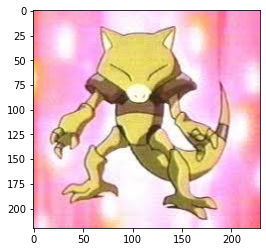

In [20]:
pokemon_labels = pd.DataFrame(pokemons, columns = ['FileName', 'Label'])
# credit to https://towardsdatascience.com/how-to-cluster-images-based-on-visual-similarity-cd6e7209fe34
#    for help with image processing
# load the image as a 224x224 array
img = load_img('../data/PokemonData/'+pokemon_labels.iloc[0]['Label']
               +'/'+pokemon_labels.iloc[0]['FileName'], 
               target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)
reshaped_img = img.reshape(1,224,224,3)
x = preprocess_input(reshaped_img)
import matplotlib.image as mpimg
plt.imshow(mpimg.imread('../data/PokemonData/'+pokemon_labels.iloc[0]['Label']
               +'/'+pokemon_labels.iloc[0]['FileName']))